## Парсим данные с Индексом промышленного производства

In [2]:
# Рисовать графики сразу 
%matplotlib inline 

# необходимые либы 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import time

# Для виджетов 
from IPython.display import display, clear_output
from ipywidgets import DatePicker, Checkbox, ToggleButton, HBox

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [5]:
from data.regions import URAL_FILE_NAMES, Region, Districts, COUNTRY

def date_parser(period): 
    period = period.replace('январь-','')
    period = period.replace(' года', '')
    month_ru = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 
                'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь',]
    for month, month_ru in enumerate(month_ru, 1):
        period = period.replace(month_ru, str(month))
    
    # останется в формате "3 2020"
    return dt.datetime.strptime(period, '%m %Y')
    
df = None
for region, fn in URAL_FILE_NAMES.items(): 
    print(region, fn)
    region_df =  pd.read_csv('data/ipm/month/Ural/' + fn,
                             sep=',', encoding="cp1251",
                             parse_dates={'DATE':['Период']}, 
                             date_parser=date_parser)
    # удаляем столбец данных страны 
    region_df = region_df.drop(columns=[COUNTRY])
    # удаляем столбец данных округа 
    for distr in Districts: 
        if distr.value in region_df.keys(): 
            region_df = region_df.drop(columns=[distr.value])
    
    # объединяем в один массив 
    if df is None: 
        df = region_df
    else: 
        df = df.merge(region_df, on='DATE')
    

df


Region.Bash Республика_Башкортостан.csv
Region.Oren Оренбургская_область.csv
Region.Perm Пермский_край.csv
Region.Sverd Свердловcкая_область.csv
Region.Tymen Тюменская_область.csv
Region.Chel Челябинская_область.csv


,DATE,Республика Башкортостан,Оренбургская область,Пермский край,Свердловская область,Тюменская область,Челябинская область
0,2020-09-01,"96,50","95,30","96,70","100,60","97,20","96,90"
1,2020-08-01,"96,70","95,10","96,70","100,80","97,30","96,00"
2,2020-07-01,"97,80","96,30","97,60","102,50","97,70","97,20"
3,2020-06-01,"97,40","89,80","92,50","102,30","88,10","97,90"
4,2020-05-01,"98,90","90,00","91,50","97,10","90,30","91,00"
...,...,...,...,...,...,...,...
88,2013-05-01,"103,00","96,60","98,90","107,60","99,90","98,90"
89,2013-04-01,"103,60","97,10","99,10","109,70","99,70","99,10"
90,2013-03-01,"99,90","97,20","99,50","108,90","100,50","99,10"
91,2013-02-01,"98,80","96,50","99,40","111,80","99,40","101,50"


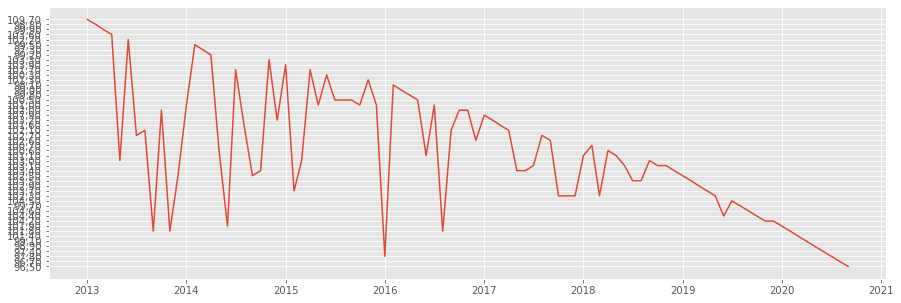

In [8]:
plt.plot(df['DATE'], df[region.Bash.value])

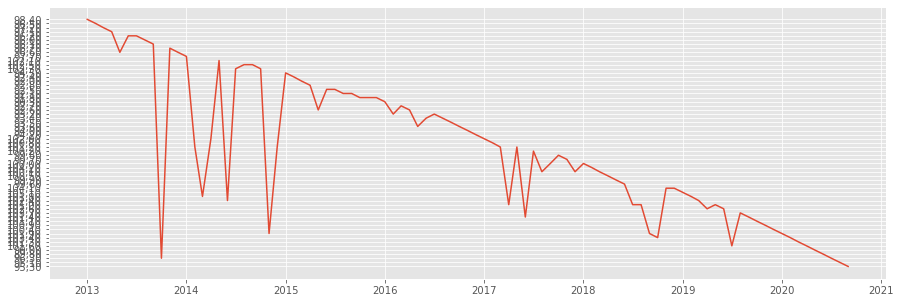

In [9]:
plt.plot(df['DATE'], df[region.Oren.value])

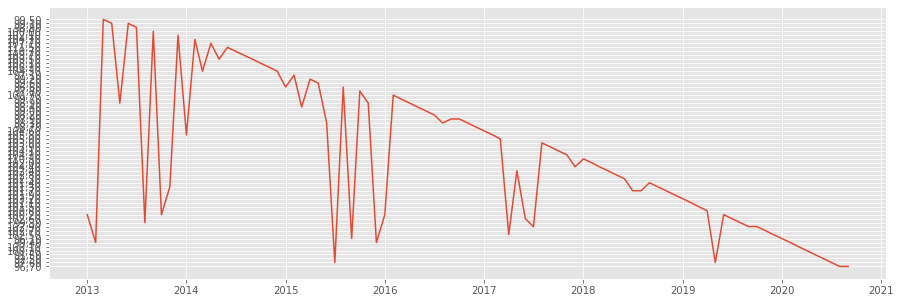

In [10]:
plt.plot(df['DATE'], df[region.Perm.value])

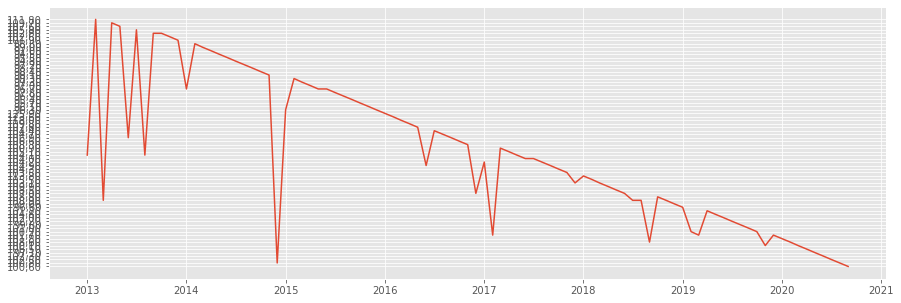

In [11]:
plt.plot(df['DATE'], df[region.Sverd.value])

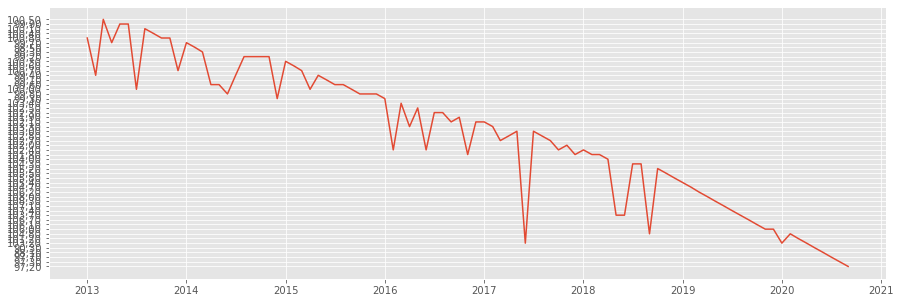

In [12]:
plt.plot(df['DATE'], df[region.Tymen.value])

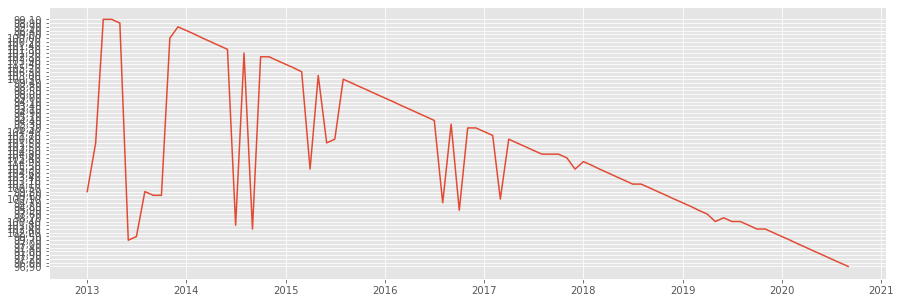

In [13]:
plt.plot(df['DATE'], df[region.Chel.value])